In [5]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

Opening raw data file /Users/Barbu/Documents/Postdoc/Experiments/Pushmi/MEG/Pilot/Maxence/run1.fif...
    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
    Range : 53000 ... 486999 =     53.000 ...   486.999 secs
Ready.
Reading 0 ... 433999  =      0.000 ...   433.999 secs...


/var/folders/m9/d3b75mr14wg1v3yrwmhsc0nh0000gn/T/ipykernel_62573/41325993.py:5: RuntimeWarning: This filename (/Users/Barbu/Documents/Postdoc/Experiments/Pushmi/MEG/Pilot/Maxence/run1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_fname,allow_maxshield=True, preload=True)
/var/folders/m9/d3b75mr14wg1v3yrwmhsc0nh0000gn/T/ipykernel_62573/41325993.py:5: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne.io.read_raw_fif(raw_fname,allow_maxshield=True, preload=True)


    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
Effective window size : 2.048 (s)


/opt/homebrew/anaconda3/envs/psiho/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


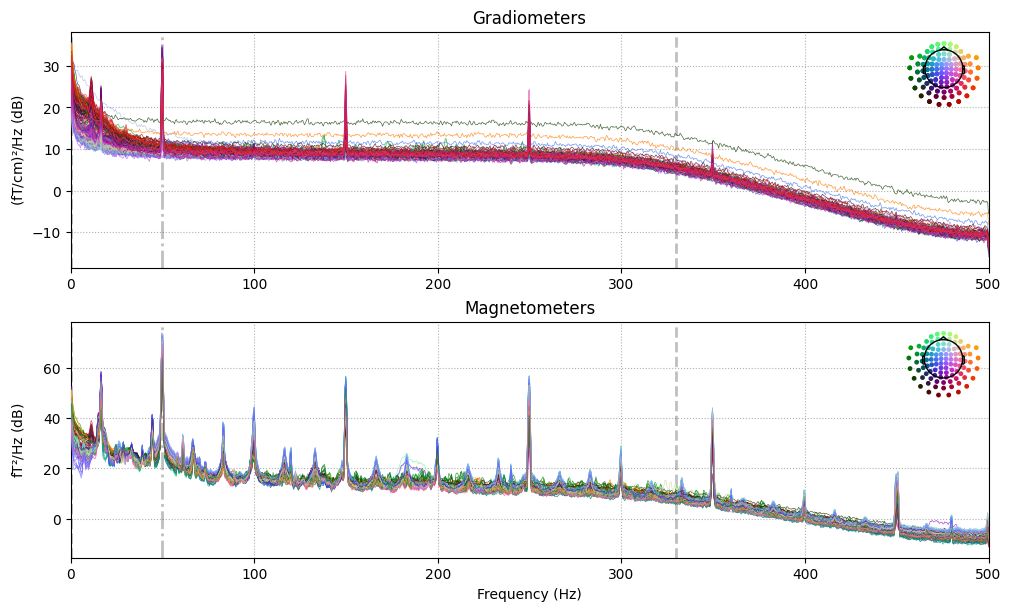

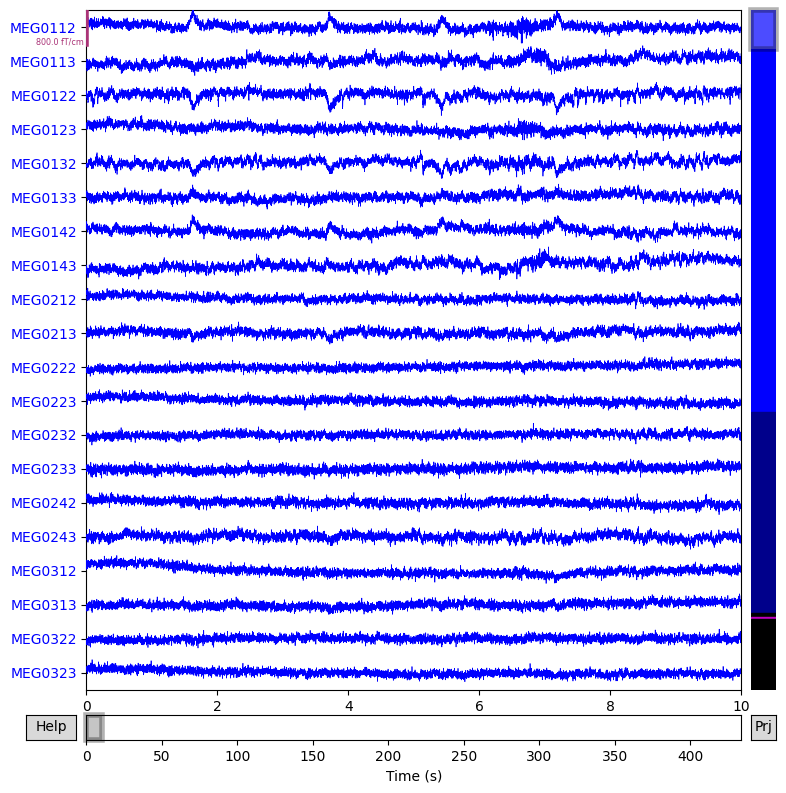

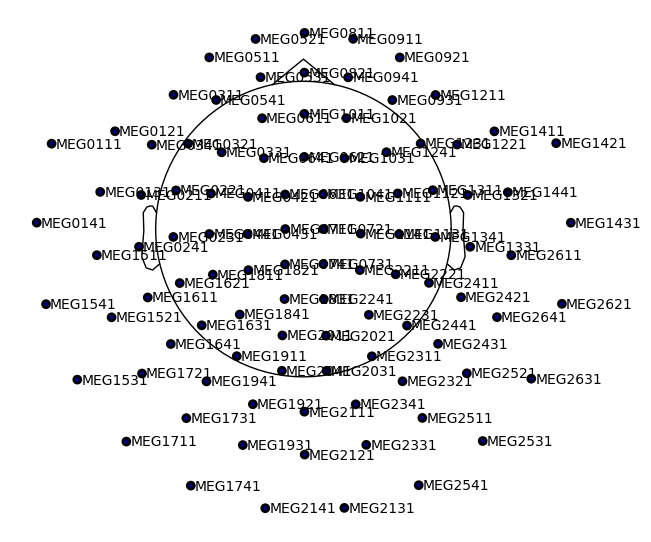

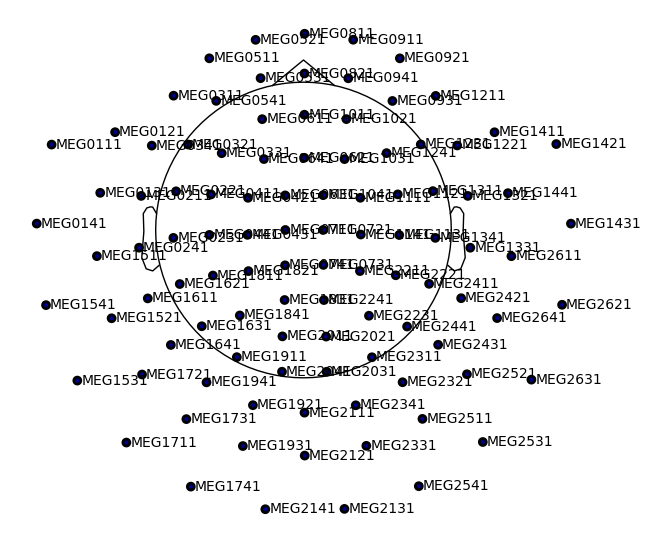

In [15]:
base_path = "/Users/Barbu/Documents/Postdoc/Experiments/Pushmi/MEG/Pilot/Maxence"

raw_fname =  f"{base_path}/run1.fif"

raw = mne.io.read_raw_fif(raw_fname,allow_maxshield=True, preload=True)
info = mne.io.read_info(raw_fname)
raw.compute_psd().plot(picks='meg')

raw.plot()
mne.viz.plot_sensors(raw.info,show_names=True)

In [7]:
# for ll in range(3):
#     plt.plot(raw.get_data()[ll,:30*1000])
# noisy_chs, flat_chs = mne.preprocessing.find_bad_channels_maxwell(raw)

# Events

608 events found on stim channel STI101
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
32 events found on stim channel STI101
Event IDs: [  512 16384]


/var/folders/m9/d3b75mr14wg1v3yrwmhsc0nh0000gn/T/ipykernel_62573/3809293021.py:4: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events_presentation, sfreq=raw.info['sfreq'], verbose=True)


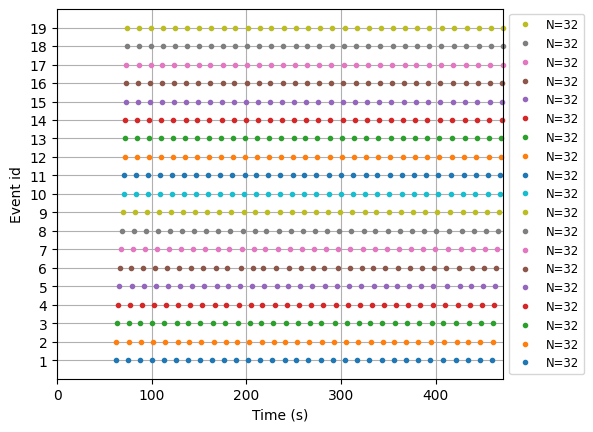

In [16]:
events_presentation = mne.find_events(raw, mask_type='not_and', mask=2**8+2**9+2**10+2**11+2**12+2**13+2**14+2**15, min_duration=0.002)
events_button_presses = mne.find_events(raw, mask_type='and', mask=2**8+2**9+2**10+2**11+2**12+2**13+2**14+2**15, min_duration=0.002)

mne.viz.plot_events(events_presentation, sfreq=raw.info['sfreq'], verbose=True)

diff_times = np.diff(events_presentation[:,0])

The average difference between event_id 12 and event_id 13 is: 0.1980 seconds


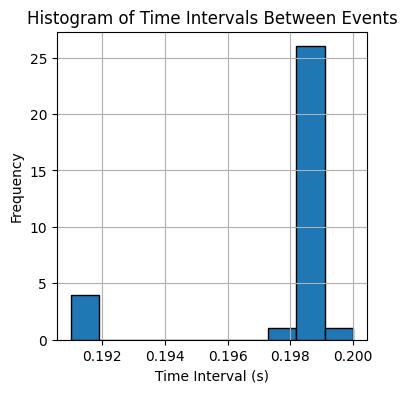

In [32]:
def timediff(event_id1, event_id2):

    diffs = []
    for i in range(len(events_presentation) - 1):
        if events_presentation[i, 2] == event_id1 and events_presentation[i+1, 2] == event_id2:
            # The events array stores sample numbers, so convert to seconds
            time_event1 = events_presentation[i, 0] / raw.info['sfreq']
            #print(time_event1)
            time_event2 = events_presentation[i+1, 0] / raw.info['sfreq']
            #print(time_event2)
            diffs.append(time_event2 - time_event1)
    #print(diffs)

    if diffs:
        average_difference = np.mean(diffs)
        print(f"The average difference between event_id {event_id1} and event_id {event_id2} is: {average_difference:.4f} seconds")
    else:
        print(f"No pairs of event_id {event_id1} followed by event_id {event_id2} found.")

    plt.figure(figsize=(4, 4))
    plt.hist(diffs, edgecolor='black')
    plt.xlabel('Time Interval (s)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Time Intervals Between Events')
    plt.grid(True)
    plt.show()

timediff(12, 13)

# Photodiode

In [33]:
raw_fname = f"{base_path}/run1.fif"
raw = mne.io.read_raw_fif(raw_fname, allow_maxshield=True, preload=True)

# Find index of photodiode channel
idx = raw.ch_names.index('MISC006')

# Get data, modify photodiode channel only
data = raw.get_data()
data[idx, :] = (data[idx, :] > 0.02).astype(float)  # step function

# Replace the modified data
raw._data = data  # now _data is available because preload=True

# Now you can do:
events_photo = mne.find_events(raw, stim_channel='MISC006')
events_presentation = mne.find_events(raw, mask_type='not_and', mask=2**5+2**6+2**7+2**8+2**9+2**10+2**11+2**12+2**13+2**14+2**15, min_duration=0.002)

plt.hist(events_photo[:,0] - events_presentation[:,0])
plt.title("Difference between photodiode and event trigger times in the localizer (ms)")
plt.show()

Opening raw data file /Users/Barbu/Documents/Postdoc/Experiments/Pushmi/MEG/Pilot/Maxence/run1.fif...
    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
    Range : 53000 ... 486999 =     53.000 ...   486.999 secs
Ready.
Reading 0 ... 433999  =      0.000 ...   433.999 secs...


/var/folders/m9/d3b75mr14wg1v3yrwmhsc0nh0000gn/T/ipykernel_62573/979980891.py:2: RuntimeWarning: This filename (/Users/Barbu/Documents/Postdoc/Experiments/Pushmi/MEG/Pilot/Maxence/run1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_fname, allow_maxshield=True, preload=True)
/var/folders/m9/d3b75mr14wg1v3yrwmhsc0nh0000gn/T/ipykernel_62573/979980891.py:2: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne.io.read_raw_fif(raw_fname, allow_maxshield=True, preload=True)


448 events found on stim channel MISC006
Event IDs: [1]
608 events found on stim channel STI101
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


ValueError: operands could not be broadcast together with shapes (448,) (608,) 

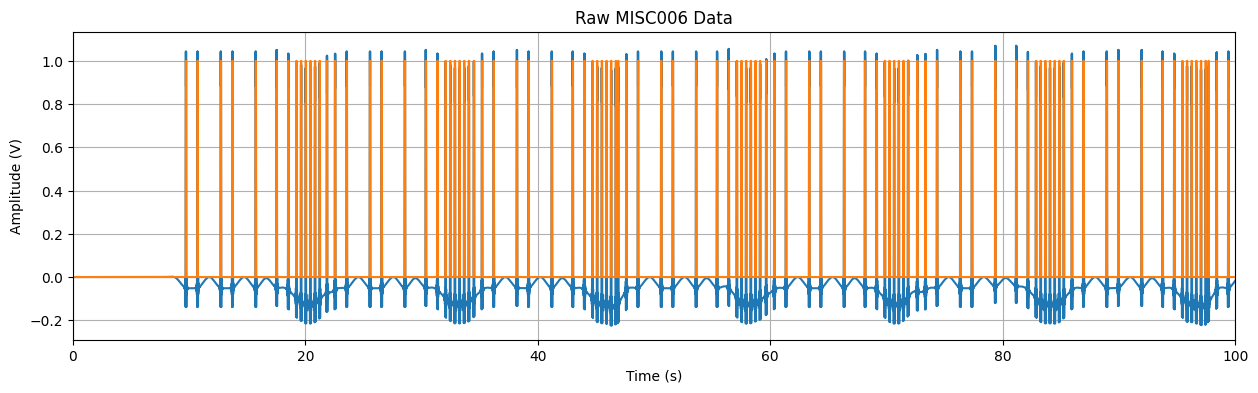

Please inspect the plot above to determine good 'height' (amplitude threshold) and 'distance' (minimum samples between peaks) for find_peaks.


In [24]:
# Get raw data from MISC006
photodiode_channel_name = "MISC006"
misc006_data, misc006_times = raw.get_data(picks=photodiode_channel_name, return_times=True)
misc006_data = misc006_data.flatten()
sfreq = raw.info['sfreq']

misc006_filtered = mne.filter.filter_data(misc006_data, sfreq, 
                                          l_freq=1, h_freq=40, 
                                          verbose='error')

misc006_filtered_step = (misc006_filtered > 0.5).astype(float)

# Plot a segment of the filtered data to visually determine 'height' and 'distance'.
# You should look at the waveform of the photodiode signal here.
plt.figure(figsize=(15, 4))
plt.plot(misc006_times, misc006_filtered)
plt.plot(misc006_times, misc006_filtered_step)
plt.title(f'Raw {photodiode_channel_name} Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.xlim(misc006_times[0], misc006_times[0] + 100) # Plot first 5 seconds
plt.show()
print("Please inspect the plot above to determine good 'height' (amplitude threshold) and 'distance' (minimum samples between peaks) for find_peaks.")